In [1]:
from Pr2Functions import * 
from  metrikz import mse,ssim, snr 

# Sistemes Multimèdia

## Practica Sessió 2: Compressió de vídeos amb h261 i MPEG.



### 1. Donat una pel·lícula de 98 minuts en format 4K amb una resolució de 3840x2160, calculeu la mida del fitxer (en MB, GB o TB) per a guardar el vídeo sense compressió. Tingueu en compte tots els aspectes més comuns pels valors de fps, bits per píxel, canals de colors, etc. especifiqueu fins valors heu escollit en cada cas.


Cada píxel té 3 canals (R, G, B), i cada canal té 8 bits (1 byte), per tant: 

Mida d’un píxel = 3 × 8 = 24 bits = 3 bytes 

La mida d’un fotograma és: 

Mida per fotograma = 3840 × 2160 × 3 bytes = 24883200 bytes = 24.88 MB 

Amb 30 fotogrames per segon: 

Mida per segon = 24.88 × 30 = 746.5 MB 

Si la pel·lícula té una durada de 98 min: 

Mida total = 746.5 × 60 seg × 98 min = 746.5 × 5880 = 4389.42 GB = 4.39 TB 


### 2. El paràmetre Q-scale de MPEG. Escolliu 5 vídeos que tinguin característiques diferents (més/menys detall/moviment, etc.) per a fer servir com a dataset d’aquesta pràctica de la web http://media.xiph.org/video/derf/


Els vídeos que analitzarem son: akiyo, bus, flower, football i foreman. 

In [2]:

videos = [
    './Videos/akiyo_cif.y4m',
    './Videos/bus_cif.y4m',
    './Videos/flower_cif.y4m',
    './Videos/football_cif.y4m',
    './Videos/foreman_cif.y4m'
]


#### 2.1 Utilitzant un visualitzador de vídeos, com pot ser el VLC de VideoLAN. Mirar quin és el còdec de cada vídeo descarregat. Quin còdec fan servir i quin espai de color?
Tots els vídeos estan en format raw, per tant cap té còdec, i l’espai de color dels vídeos és YUV 4:2:0.  

Y és la luminància, que fa referencia al brill de cada píxel. 

U i V són la crominància, que contenen la informació de color. 



#### 2.2 Què és el paràmetre Q-scale dins la família de còdec MPEG? Explica detalladament.
El paràmetre Q-scale dins de la família de còdecs MPEG és un factor que controla el nivell de quantització aplicat a la compressió d'imatges i vídeo. D’aquesta manera, Q-scale regula el nivell de compressió amb pèrdua afectant directament la qualitat del vídeo i la mida del fitxer. 

La quantització és un procés fonamental en la compressió amb pèrdua, ja que redueix la precisió de certes dades per disminuir la mida del fitxer. 

MPEG utilitza DCT per convertir blocs d'imatge en components de freqüència. Després de la transformada DCT, s’aplica la quantització per reduir el nombre de bits necessaris per emmagatzemar aquestes dades. 

El Q-scale determina el grau d’aquesta quantització, si té valors baixos, es produeixes menys quantització, per tant, major qualtat i una mida més gran. Si el Q-scale prèn valors alts, farem més quantització, per tant, menor qualitat i, en conseqüència, una mida més petita. 

En la quantització, cada coeficient de la DCT es divideix per un valor de quantització determinat per Q-scale. Els coeficients amb valors petits tendeixen a convertir-se en zero, eliminant detalls d'alta freqüència i reduint la mida del fitxer. 


#### 2.3 Comprimiu els vídeos utilitzant H.261 (aplicació ffmpeg amb el paràmetre -vcodec h261), variant el paràmetre de q-scale (repetir amb 4 valors diferents de q-scale cada vídeo). Quan ocupa cada vídeo comprimit?. Feu una taula amb la ratio de compressió d’aquests vídeos respecte del vídeo original.




|Paràmetres Q-scale| Akiyo | Bus | Flower | Football | Foreman | 
|---| --- | --- | --- | --- | --- | 
|5 | 87.13 | 10.16 | 8.18 | 13.21 | 22.27 |
|10 | 154.72 | 20.91 | 16.28 | 27.27 | 51.81 |
|15 | 200.4 | 32.72 | 25.62 | 41.25 | 79.8 |
|25 | 250.62 | 57.32 | 48.73 | 66.74 | 118.64 |



#### 2.4 Repetir l’apartat anterior ara comprimint amb MPEG2, fent servir l’aplicació ffmpeg i el paràmetre -vcodec mpeg2video



| Paràmetres Q-scale | Akiyo | Bus | Flower | Football | Foreman |
|---| --- | --- | --- | --- | --- | 
| 5 | 80.98 | 10.77 | 8.86 | 13.64 | 22.3 |
| 10 | 144.5 | 21.42 | 16.96 | 27.03 | 49.6 |
| 15 | 192.97 | 33.12 | 25.92 | 40.82 | 78.61 |
| 25 | 259.02 | 58.49 | 47.54 | 67.98 | 131.03 |


#### 2.5 Genereu els frames de cada vídeo. Recorreu els vídeos codificats quadre per quadre (frame) i mesureu l’error de compressió fent servir la mètrica MSE. Calculeu el promig de MSE per a cada valor de q-scale i comenteu els resultats dels 4 valors de q-scale (mida del fitxer resultant al disc, el canvi en qualitat, etc. per cada vídeo). Tant de h261 com de MPEG2.



Promig mse h261

| Paràmetres Q-scale | Akiyo | Bus | Flower | Football | Foreman |
|---| --- | --- | --- | --- | --- | 
| 5 | 13.77 | 39.36 | 44.35 | 34.24 | 22.88 |
| 10 | 29.53 | 98.41 | 133.28 | 82.93 | 71.24 |
| 15 | 46.38 | 160.35 | 236.65 | 131.72 | 104.93 |
| 25 | 81.28 | 276.69 | 445.91 | 218.17 | 160.25 |


Promig mse mpeg2


|     Paràmetres Q-scale | Akiyo | Bus | Flower | Football | Foreman |
|---| --- | --- | --- | --- | --- | 
|     5 | 11.60 | 28.45 | 32.34 | 23.41 | 24.73 |
|     10 | 23.87 | 70.60 | 96.07 | 56.33 | 53.64 |
|     15 | 36.70 | 115.82 | 170.95 | 90.62 | 80.44 |
|     25 | 62.87 | 205.43 | 327.07 | 156.87 | 128.33 |

El MSE augmenta a mesura que q-scale creix, això es deu a que es redueix la quantitat de dades del vídeo. Al tenir una major compressió, hi ha una pèrdua de qualitat més gran. A més a més, els vídeos amb més detalls i moviment (Flower i Bus) tenen valors de MSE molt més alts que els vídeos estàtics (Akiyo), cosa que mostra que la compressió afecta més als vídeos amb més variabilitat. 

Si comparem el dos modes de compressió, observem com MPEG2 té menors valors de MSE que h261, indicant que té una compressió més eficient per a una mateixa quantitat de compressió. A mesura que q-scale augmenta, la diferència es fa més evident, amb h261 patint una pèrdua de qualitat més gran. 

En quant a la mida dels fitxers, com que un valor de q-scale més gran implica una compressió més agressiva, es redueix la mida del fitxer disminuint la qualitat. Per tant, pels valors de q-scale baixos com 5, la mida del fixer és més gran, ja que hi ha menys compressió i la imatge és més semblant a la original. En canvi, per q-scale de 25, la mida del fitxer és menor, però la pèrdua de qualitat és molt visible. Especialment en els vídeos de més detall, que són els més afectats per l’augment de q-sacle.  


 



### 3. Comparació dels vídeos i de les mètriques. A partir dels resultats anteriors obtinguts, trieu un valor de Q-scale per a fer servir a la resta d’aquesta pràctica, s’ha de justificar l’elecció. Comprimiu els 5 vídeos utilitzant MPEG2 amb el Q-scale escollit.


La tria d'un q-scale de 10 es justifica perquè ofereix un equilibri òptim entre la qualitat de la imatge i la mida del fitxer després de la compressió. Amb un q-scale de 5, la qualitat es deteriora significativament, especialment en vídeos amb molts detalls, mentre que amb valors més alts (15 o 25), la mida del fitxer augmenta massa sense una millora proporcional en la qualitat. Amb q-scale de 10, es manté una qualitat visual acceptable i es minimitza la mida del fitxer, cosa que el fa ideal si es busca un bon compromís entre qualitat i eficiència.

In [3]:
quality = 10


#### 3.1 Recorreu els vídeos codificats quadre per quadre; i per cada quadre, mesureu l’error de compressió fent servir les mètriques MSE, SSIM i SNR. Prepareu 3 gràfics (seran les Figures 1, 2 i 3), amb línies de diferents colors/formes per cada vídeo


- MSE vs. #quadre (Figura 1)
- SSIM vs. #quadre (Figura 2)
- SNR vs. #quadre (Figura 3)


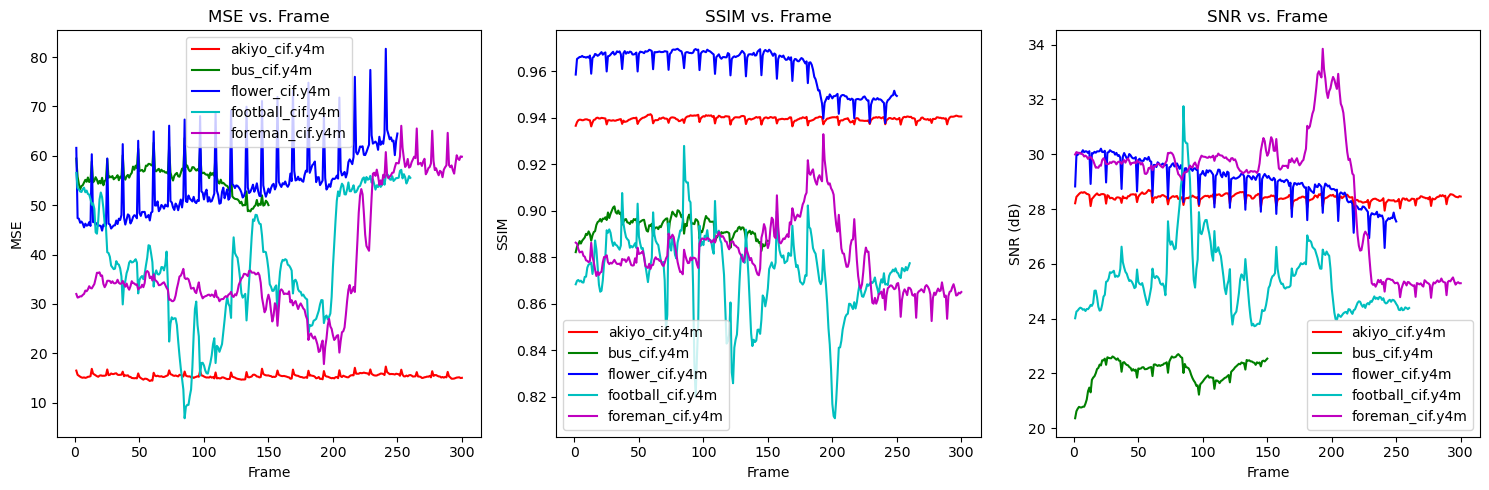

In [4]:
metrics = process_video_metrics(videos, quality)


#### 3.2 Analitzeu les figures, i comenteu les diferències en la compressió dels diferents vídeos. Comenteu les diferències entre les mètriques de comparació. Capturen els errors de la mateixa manera? 


Primerament, comentarem com funcionen les diferents mètriques de comparació:  

- MSE (Error Quadrat Mitjà): Mesura la diferència mitjana al quadrat entre els píxels originals i els comprimits; valors més baixos indiquen menys error. És una mètrica que ens dona l'error directe, però no és representativa de l'error a nivell perceptiu.  

- SSIM (Índex de Similitud Estructural):Avalua la similitud percebuda en termes de luminància, contrast i estructura. Valors més alts indiquen major similitud visual.  

- SNR (Relació Senyal-Soroll): Compara la potència del senyal original amb la del soroll introduït, mesurant la proporció de soroll respecte als detalls de la imatge. Valors més alts indiquen menys degradació.  

Analitzant els gràfics, observem que `akiyo_cif` té el MSE més baix i un SSIM estable i elevat, indicant que la compressió li afecta poc, ja que té poc moviment i detalls senzills.

En canvi, `football_CIF` mostra un MSE més alt amb pics pronunciats i una variació important en el SSIM, la qual cosa indica que la compressió afecta fortament la seva qualitat. Això es deu al fet que és un vídeo amb molt moviment i una alta complexitat visual.  

Per últim, pel que fa al SNR, `foreman_cif` presenta valors més elevats en certs segments, indicant que en alguns moments manté una bona qualitat. D'altra banda, `bus_cif` i `football_cif` tenen un SNR més baix, indicant una major pèrdua de qualitat.

#### Als vídeos, hi ha algunes parts on hi ha menys/més error comparat amb la resta del vídeo?

- Es cert que en alguns vídeos hi ha parts amb més o menys error comparant amb la resta. Com es el cas de `akiyo_cif` que és el que menys variació té en totes les gràfiques, ja que és una imatge monòtona.

- També podem observar que la gràfica de `football_cif` és bastant irregular i variant en totes les mètriques, la qual cosa té sentit, ja que, essent una imatge d'un esdeveniment esportiu, hi ha molt moviment i bastants canvis de càmera que provoquen els pics més grans.

- Una gràfica molt interessant és la de `foreman_cif`, en la qual podem veure que l'error es manté baix i amb poca variància als primers frames del vídeo, els quals corresponen a la persona parlant. Després, la persona gira la càmera de forma brusca, i això fa que el MSE augmenti al llarg de tot el vídeo, mentre que les altres mètriques també mostren molt més error.


#### 3.3 Mireu el detall de cada gràfica. Quina forma tenen i perquè tenen aquestes variacions?

Observant les gràfiques, podem veure pics en les mesures que indiquen més error en intervals regulars. Això es mostra en totes les mètriques i en totes les imatges, tot i que algunes tenen tanta variació que opaquen aquest efecte. També podem observar que com més moviment hi hagi en la imatge i més detall tingui, més gran serà l'error. I com menys constant sigui aquest moviment, més variarà la gràfica.  

Un exemple d'això és `flower_cif`, que té un moviment constant i, per tant, té un valor alt de MSE, però això no afecta tant les altres mètriques. En canvi, `foreman_cif`, que té una part més estàtica i canvis bruscos, afecta totes les mètriques, ja que això és un dels pitjors casos per a l'algorisme.